In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons
from matplotlib.ticker import FuncFormatter

import time

from dfply import *

In [2]:
lap_times = pd.read_csv("f1db_csv/lap_times2018.csv")

In [3]:
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,989,817,54,4,1:25.945,85945
1,989,817,55,4,1:26.165,86165
2,989,817,57,4,1:26.348,86348
3,989,8,57,3,1:26.373,86373
4,989,8,55,3,1:26.381,86381


Checking that the miliseconds column is the lap time in miliseconds, as opposed to minutes, seconds and miliseconds.

In [4]:
print("Expected:", lap_times["milliseconds"][0])
print("Obtained:", (1*60+25)*1000+945)

Expected: 85945
Obtained: 85945


Plotting Hamilton's lap time on Australia.

In [5]:
race_ham = (lap_times >>
        mask(X.raceId==989, X.driverId==1) >> 
        arrange(X.driverId, X.lap))

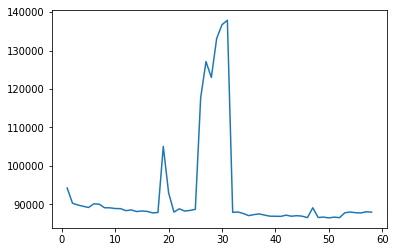

In [6]:
plt.plot(race_ham["lap"], race_ham["milliseconds"])
plt.show()

Let's try to plot all the driver's lap times

In [7]:
race = (lap_times >>
        mask(X.raceId==989) >> 
        arrange(X.driverId, X.lap))

drivers = np.unique(race["driverId"])

#plots = {}

#fig, ax = plt.subplots()
#for driver in drivers:
#    driver_race = (race >> mask(X.driverId==driver))
#    plot, = ax.plot(driver_race["lap"], driver_race["milliseconds"], label=driver)
#    plots[driver] = plot
#
#rax = plt.axes([65, 100, 15, 100])
#labels = [str(plots[driver].get_label()) for driver in plots]
#visibility = [plots[driver].get_visible() for driver in plots]
#check = CheckButtons(rax, labels, visibility)
#
#def func(label):
#    index = labels.index(label)
#    plots[index].set_visible(not plots[index].get_visible())
#    plt.draw()
#
#check.on_clicked(func)
#
#plt.show()

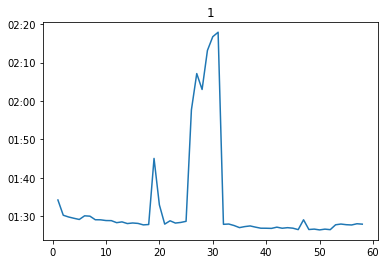

<Figure size 432x288 with 0 Axes>

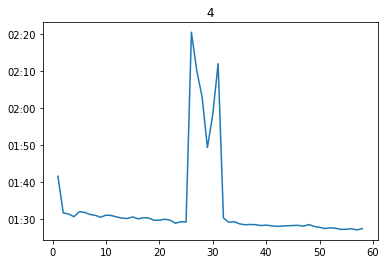

<Figure size 432x288 with 0 Axes>

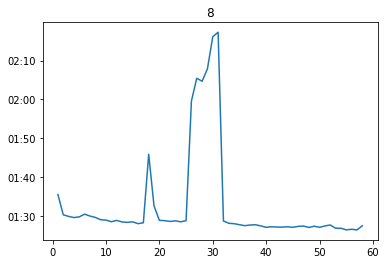

<Figure size 432x288 with 0 Axes>

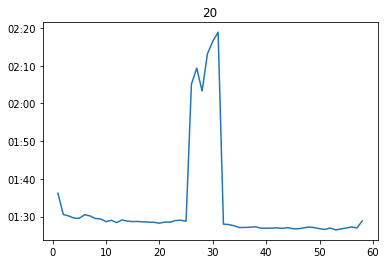

<Figure size 432x288 with 0 Axes>

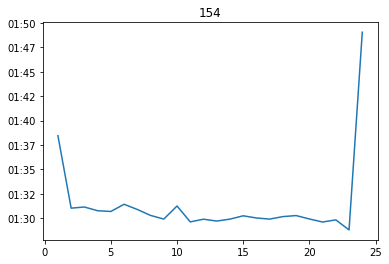

<Figure size 432x288 with 0 Axes>

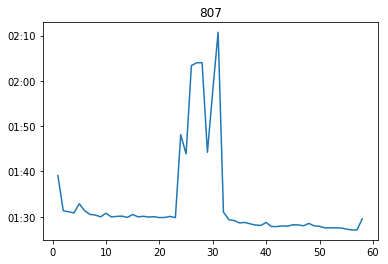

<Figure size 432x288 with 0 Axes>

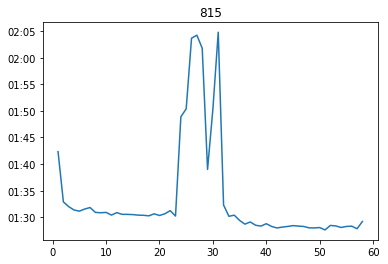

<Figure size 432x288 with 0 Axes>

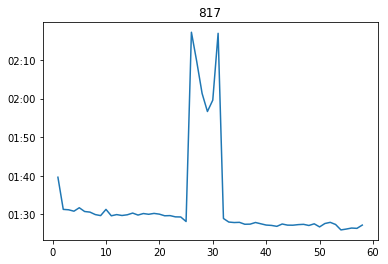

<Figure size 432x288 with 0 Axes>

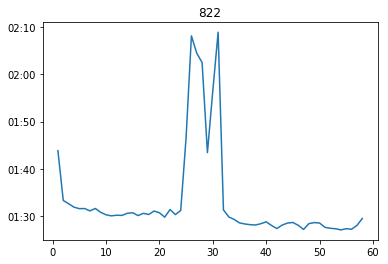

<Figure size 432x288 with 0 Axes>

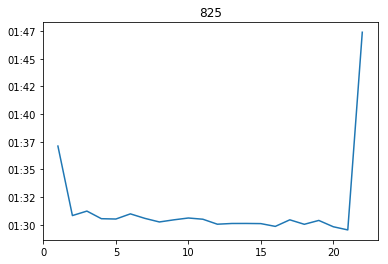

<Figure size 432x288 with 0 Axes>

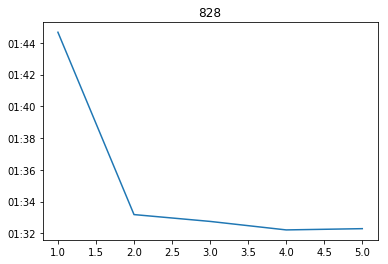

<Figure size 432x288 with 0 Axes>

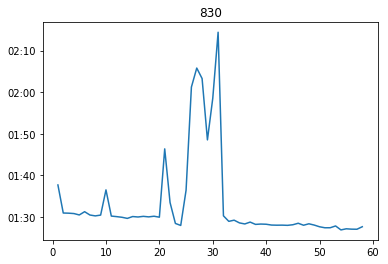

<Figure size 432x288 with 0 Axes>

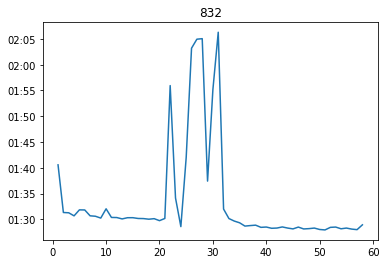

<Figure size 432x288 with 0 Axes>

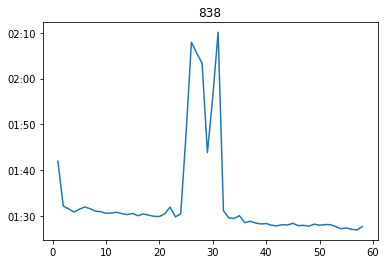

<Figure size 432x288 with 0 Axes>

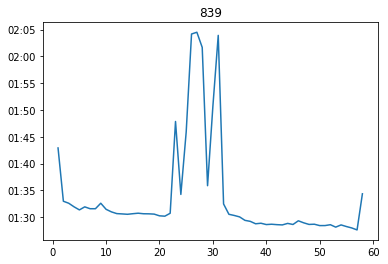

<Figure size 432x288 with 0 Axes>

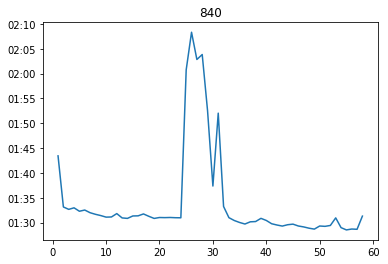

<Figure size 432x288 with 0 Axes>

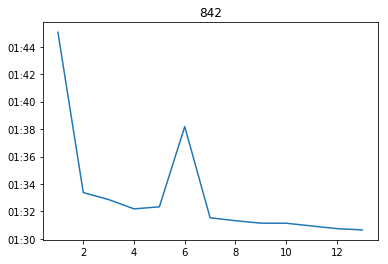

<Figure size 432x288 with 0 Axes>

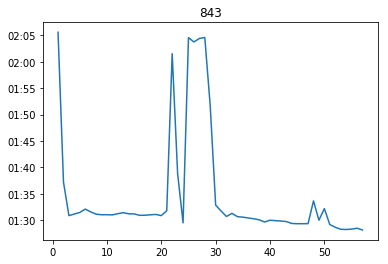

<Figure size 432x288 with 0 Axes>

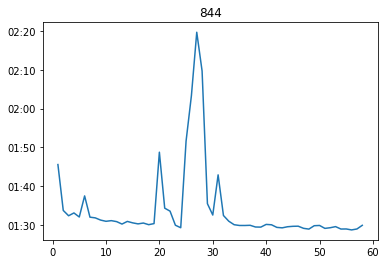

<Figure size 432x288 with 0 Axes>

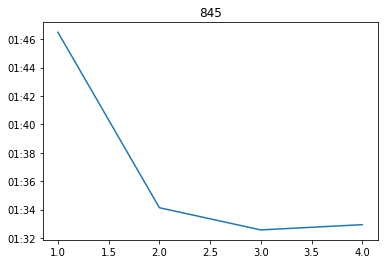

<Figure size 432x288 with 0 Axes>

In [29]:
for driver in drivers:
    driver_times = (race >>
                    mask(X.driverId==driver) >>
                    select(X.lap, X.milliseconds))
    
    fig, ax = plt.subplots();
    
    plt.plot(driver_times["lap"], driver_times["milliseconds"]);
    plt.title(driver);
    
    formatter = FuncFormatter(lambda ms, x: time.strftime('%M:%S', time.gmtime(ms // 1000)))
    ax.yaxis.set_major_formatter(formatter)
    
    plt.show();

    plt.figure();